In [2]:
#https://www.deepset.ai/german-word-embeddings =>
#https://int-emb-glove-de-wiki.s3.eu-central-1.amazonaws.com/vectors.txt
# 4GB, containing 1.3 MIO (!) tokens in 300Dims => filter for10% most common words

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.embedding import Embedding

### load embedding

In [5]:
glove_de_path = '../data/GloVe_vectors_de.txt'
glove_embedding_de = Embedding(language='de', path_list=[glove_de_path])

/Users/magdalena.aretz/code/nlp_scripts/venv/lib/python3.9/site-packages/pandas/util/_decorators.py:311: ParserWarning: Both a converter and dtype were specified for column 0 - only the converter will be used
  return func(*args, **kwargs)


In [ ]:
print(glove_embedding_de.embedding.shape)
print(type(glove_embedding_de.embedding))
print(len(glove_embedding_de.index_to_word))
print(glove_embedding_de.index_to_word[0])

### load german corpus

In [ ]:
#https://en.wiktionary.org/wiki/Wiktionary:Frequency_lists#German =>
#https://invokeit.wordpress.com/frequency-word-lists/ =>
#https://raw.githubusercontent.com/hermitdave/FrequencyWords/master/content/2016/de/de_50k.txt

In [ ]:
corpus_path = '../data/de-top-50k.txt'
with open (corpus_path) as file:
    lines=file.readlines()

In [ ]:
splitted_lines = [line.split() for line in lines]

In [ ]:
df_frequencies = pd.DataFrame(splitted_lines)
df_frequencies.columns = ['word', 'frequency']
print(df_frequencies.shape)
df_frequencies.head(2)

In [ ]:
df_frequencies['frequency'] = df_frequencies.frequency.apply(lambda x: int(x))

In [ ]:
# super long tail
np.log(df_frequencies['frequency'].iloc[:1000]).plot()

# define top n

In [ ]:
N_most_frequent = 50000 # only keep X most frequent words

In [ ]:
# these will be kept
print(df_frequencies.iloc[:N_most_frequent].tail(8))

In [ ]:
frequent_words = set(df_frequencies.iloc[:N_most_frequent]['word'])
len(frequent_words)

In [ ]:
possible_words = set(filtered_embedding.index)
len(possible_words)

In [ ]:
# only keep words that are frequent and in index of embedding
words_to_keep = list(frequent_words & possible_words)
len(words_to_keep)

In [ ]:
print(len(frequent_words - set(words_to_keep))) # these are dismissed because they do not appear in embedding list
print(list(frequent_words - set(words_to_keep))[:8])

# filter 

In [ ]:
filtered_embedding = glove_embedding_de.embedding.copy()
filtered_embedding = filtered_embedding.loc(axis=0)[words_to_keep]
filtered_embedding.head(2)

# write file

In [ ]:
filtered_glove_path = f'../data/GloVe_vectors_de_{N_most_frequent}.txt'

In [ ]:
filtered_embedding.to_csv(filtered_glove_path, sep=' ', index=True, header=None)
test = pd.read_csv(filtered_glove_path, sep=' ', index_col = 0)
test.head()

## english most frequent words

In [2]:
# https://www.kaggle.com/rtatman/english-word-frequency

### load embedding

In [2]:
glove_en_path = '../data/glove.6B.50d.txt'
glove_embedding_en = Embedding(language='en', path_list=[glove_en_path])

/Users/magdalena.aretz/code/nlp_scripts/venv/lib/python3.9/site-packages/pandas/util/_decorators.py:311: ParserWarning: Both a converter and dtype were specified for column 0 - only the converter will be used
  return func(*args, **kwargs)


total number of entries found:  399997. Dimension: 50


In [3]:
print(glove_embedding_en.embedding.shape)
print(type(glove_embedding_en.embedding))
print(len(glove_embedding_en.index_to_word))
print(glove_embedding_en.index_to_word[0])

(399997, 50)
<class 'pandas.core.frame.DataFrame'>
400000
the


## load english corpus

In [4]:
# source: https://www.kaggle.com/rtatman/english-word-frequency, 333.333 most frequent words
df_word_frequencies = pd.read_csv('../data/en_unigram_freq.csv')

In [9]:
print(df_word_frequencies.shape)
df_word_frequencies.head()

(333333, 2)


,word,count
0,the,23135851162
1,of,13151942776
2,and,12997637966
3,to,12136980858
4,a,9081174698


<AxesSubplot:>

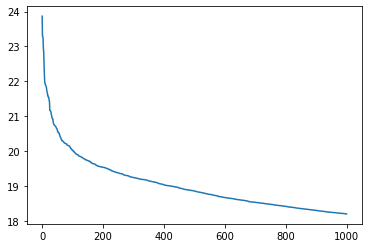

In [11]:
# super long tail
np.log(df_word_frequencies['count'].iloc[:1000]).plot()

In [12]:
N_most_frequent = 50000 # only keep 50k of 400k most frequent words

In [15]:
# these will be kept
print(df_word_frequencies.iloc[:N_most_frequent].tail(8))

             word   count
49992  camberwell  333325
49993    hotlines  333309
49994    hazelton  333297
49995         nlg  333289
49996   reaffirms  333279
49997   anleitung  333245
49998   webalizer  333242
49999         paa  333226


In [17]:
frequent_words = set(df_word_frequencies.iloc[:N_most_frequent]['word'])
len(frequent_words)

49999

In [18]:
possible_words = set(glove_embedding_en.embedding.index)
len(possible_words)

399997

In [19]:
# only keep words that are frequent and in index of embedding
words_to_keep = list(frequent_words & possible_words)
len(words_to_keep)

47808

In [20]:
print(len(frequent_words - set(words_to_keep))) # these are dismissed because they do not appear in embedding list
print(list(frequent_words - set(words_to_keep))[:8])

2191
[nan, 'travelguide', 'allrecipes', 'nprm', 'keygen', 'flexeril', 'frontgate', 'webtrends']


# filter 

In [21]:
filtered_embedding = glove_embedding_en.embedding.copy()
filtered_embedding = filtered_embedding.loc(axis=0)[words_to_keep]
filtered_embedding.head(2)

,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
0,,,,,,,,,,,,,,,,,,,,,
yonkers,-0.133423,-0.072449,-0.440186,0.082825,-0.202271,0.421631,-0.877441,0.046722,-0.311523,-0.188354,...,-1.150391,-0.099731,-0.119873,0.420898,-0.153809,0.359619,0.055206,-0.535156,0.131470,0.187012
ebrd,1.671875,0.295654,0.011101,-0.384766,-0.280029,-0.994629,0.404053,-0.540527,-0.187012,-0.104187,...,-0.569336,-0.017242,0.793457,-1.391602,-0.733887,0.568848,-0.470459,0.913574,0.199341,0.060638


# write file

In [22]:
filtered_glove_path = f'../data/glove.6B.50d.{N_most_frequent}.txt'

In [24]:
filtered_embedding.to_csv(filtered_glove_path, sep=' ', index=True, header=None)
test = pd.read_csv(filtered_glove_path, sep=' ', index_col = 0, header=None)
test.head()

,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
0,,,,,,,,,,,,,,,,,,,,,
yonkers,-0.1334,-0.07245,-0.4402,0.0828,-0.2023,0.4216,-0.8774,0.04672,-0.3115,-0.1884,...,-1.1500,-0.09973,-0.1199,0.4210,-0.15380,0.3596,0.0552,-0.5350,0.1315,0.18700
ebrd,1.6720,0.29570,0.0111,-0.3848,-0.2800,-0.9946,0.4040,-0.54050,-0.1870,-0.1042,...,-0.5693,-0.01724,0.7935,-1.3920,-0.73400,0.5690,-0.4705,0.9136,0.1993,0.06064
majestic,0.7437,1.04000,-0.6620,0.0386,0.2340,-0.6320,-0.2510,-0.37720,-0.2915,0.5540,...,-0.3670,-0.22280,-0.1644,0.1490,-0.45100,0.5503,0.1127,-1.0560,-0.2384,-0.62350
verb,0.9526,0.96040,-1.0540,-0.4817,0.8345,0.7430,2.0250,0.07385,-2.3280,0.6560,...,0.6797,-0.79150,-0.3838,1.1470,0.12630,-0.8784,1.9490,0.8300,0.3300,-0.06350
olympus,0.8096,0.50200,1.4590,-0.2625,-0.5100,-0.2498,0.1460,-0.76800,-0.6196,0.4941,...,0.7324,-0.09270,-0.1630,0.0665,-0.10315,-0.2201,0.9540,-0.3276,-0.1519,-0.99900
